# Pymaceuticals Inc.
---

### Analysis by SE. Directions:compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
 The pie charts that the data has a good population of males and female mice in the study.
 The outliner Infubinol 31    36.321346 should be investigate for more understanding. 
 the correlation of Tumor Volume  vs Mouse weight shows high correlation. ( the data stay close to the regression line)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")            

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(mouse_data_complete["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_ids = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

dup_mice_ids 


array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
#dup_mice_ids = mouse_data_complete[mouse_data_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]

#dup_mice_ids 

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] != "g989"]    
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_count =  len(clean_mouse_data["Mouse ID"].unique())  
mice_count

248

In [ ]:
mouse_data_complete.count()

In [ ]:
type(mouse_data_complete)

In [ ]:
mouse_data_complete.describe()

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


drug_reg_mean= clean_mouse_data.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
drug_reg_median = clean_mouse_data.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
drug_reg_var = clean_mouse_data.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
drug_reg_std = clean_mouse_data.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
drug_reg_sem = clean_mouse_data.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

 

drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,
                                     "Median Tumor Volume": drug_reg_median,
                                     "Tumor Volume Variance" : drug_reg_var,
                                     "Tumor Volume Std. Dev." : drug_reg_std,
                                     "Volume Std. Err." : drug_reg_sem
                                    })
                                 
drug_regimen_summary


C:\Users\espos\AppData\Local\Temp\ipykernel_12112\1190682000.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_reg_mean= clean_mouse_data.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
C:\Users\espos\AppData\Local\Temp\ipykernel_12112\1190682000.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_reg_median = clean_mouse_data.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
C:\Users\espos\AppData\Local\Temp\ipykernel_12112\1190682000.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to F

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
type(drug_regimen_summary)

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_reg_mean= clean_mouse_data.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
drug_reg_median = clean_mouse_data.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
drug_reg_var = clean_mouse_data.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
drug_reg_std = clean_mouse_data.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
drug_reg_sem = clean_mouse_data.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

 

drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,
                                     "Median Tumor Volume": drug_reg_median,
                                     "Tumor Volume Variance" : drug_reg_var,
                                     "Tumor Volume Std. Dev." : drug_reg_std,
                                     "Volume Std. Err." : drug_reg_sem
                                    })
                                 
drug_regimen_summary

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

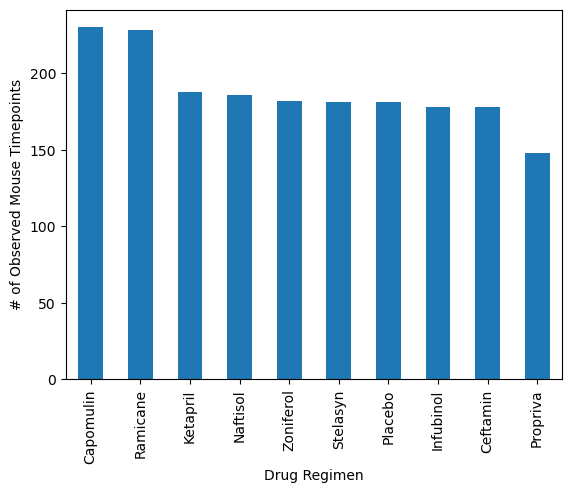

In [7]:
#pandas
drug_counts = clean_mouse_data["Drug Regimen"].value_counts()
 
drug_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


In [ ]:
type(drug_counts)

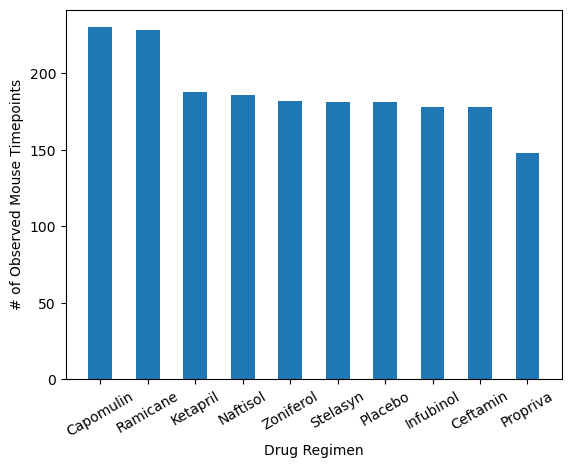

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts, width = 0.5, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

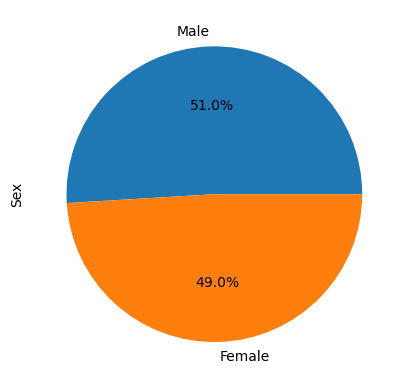

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
six_counts = clean_mouse_data["Sex"].value_counts().plot(kind='pie',y='Sex',autopct="%1.1f%%")
labels = ["Male","Female"]


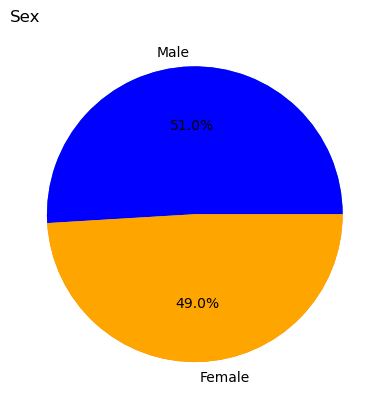

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
six_counts = clean_mouse_data["Sex"].value_counts()
colors = ["blue","Orange"]
plt.pie(six_counts)
plt.title('Sex',loc='left')
plt.pie(six_counts,labels=labels,colors=colors,autopct="%1.1f%%") 
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
 
# Start by getting the last (greatest) timepoint for each mouse

df_MiceTimePT = pd.DataFrame(clean_mouse_data)

Max_TimePt = df_MiceTimePT.groupby(['Mouse ID'])['Timepoint'].max()
Max_TimePt
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

df_MaxTimePts = pd.merge(Max_TimePt, df_MiceTimePT, how="left", on=["Mouse ID","Timepoint"])   
df_MaxTimePts




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
#unique list of name of Drug Regs

Dg_Reg = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
type(Dg_Reg)

# Create empty list to fill with tumor vol data (for plotting)
TumorVolData =[]
#type(TumorVolData)

# Calculate the IQR and quantitatively determine if there are any potential outliers. ##general statement
##above is a general statement to confuse
    
# Locate the rows which contain mice on each drug and get the tumor volumes
#start the loop spin thru the list of Drug Reg names
for X in Dg_Reg:
    #get row with match drug reg and return tumor volume
    TumorVolDatabyDgReg = df_MaxTimePts.loc[df_MaxTimePts["Drug Regimen"]==X]["Tumor Volume (mm3)"]

    # add subset AKA append the data to convert to list THIS IS THE EMPTY LIST DECLARED ABOVE
    TumorVolData.append(TumorVolDatabyDgReg)
    
    # Determine outliers using upper and lower bounds ##DV2 - 02  
    quarts = TumorVolDatabyDgReg.quantile([0.25, 0.5, 0.75])
    ([0.25, 0.5, 0.75])
    lowerq = quarts[0.25]
    upperq = quarts[0.75]
    iqr = upperq-lowerq
    
    f_low = lowerq - (1.5*iqr)
    f_high = upperq + (1.5*iqr)
    resultsDF = TumorVolDatabyDgReg.loc[(TumorVolDatabyDgReg < f_low) | (TumorVolDatabyDgReg > f_high) ]
    print(X,resultsDF)
    


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Dist of Tumor Vol by Treatment')

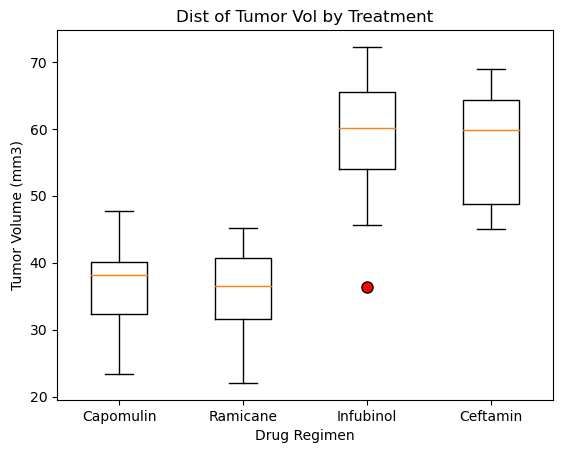

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#boxplot = resultsDF
Dg_Reg = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]

TV = {Dg_Reg[i]:TumorVolData[i] for i in range(len(Dg_Reg))}
labels = [Dg_Reg  for Dg_Reg  in Dg_Reg ]
plt.boxplot(TV.values(),labels=labels,flierprops=dict(marker='o',markerfacecolor='red',markersize=8))
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Dist of Tumor Vol by Treatment")

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time for Mouse 15(Capomulin)')

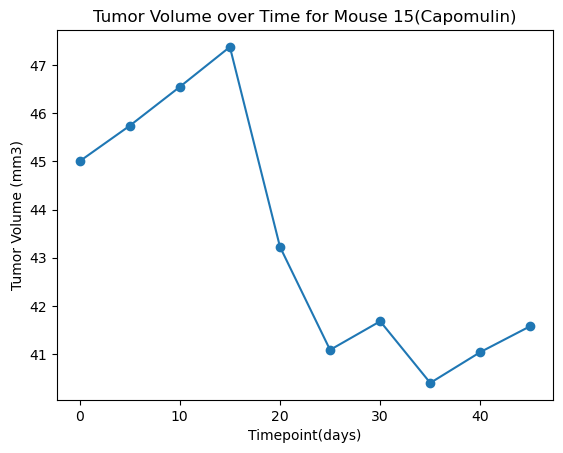

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']
Amouse = clean_mouse_data[clean_mouse_data['Mouse ID'] == 'r944']
plt.plot(Amouse['Timepoint'], Amouse["Tumor Volume (mm3)"], marker='o')
#
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time for Mouse 15(Capomulin)')

C:\Users\espos\AppData\Local\Temp\ipykernel_12112\3195409149.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MSiD =  MSiD.groupby("Mouse ID").mean()


Text(0.5, 1.0, 'Tumor Volume  vs Mouse weight for Capomulin')

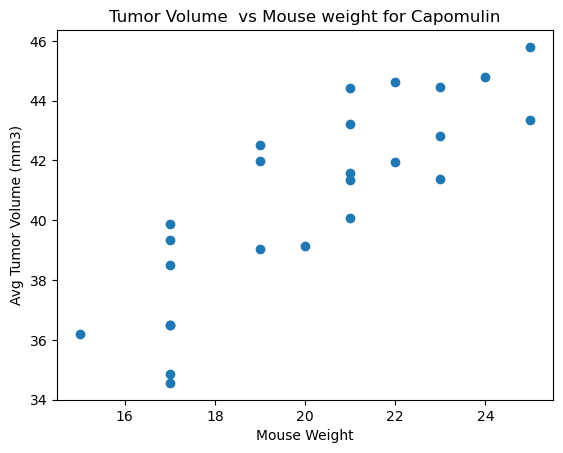

In [107]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
##Example in DV 2 06
MSiD = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

MSiD =  MSiD.groupby("Mouse ID").mean()
#MSWT =  clean_mouse_data["Weight (g)"]
plt.scatter(x=MSiD["Weight (g)"],y=MSiD["Tumor Volume (mm3)"])
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Tumor Volume  vs Mouse weight for Capomulin')

## Correlation and Regression

The correlation of Mouse Wt vs Avg Tumor Volume is 0.53


C:\Users\espos\AppData\Local\Temp\ipykernel_12112\1559944191.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MSiD =  MSiD.groupby("Mouse ID").mean()


Text(0.5, 1.0, 'Tumor Volume  vs Mouse weight')

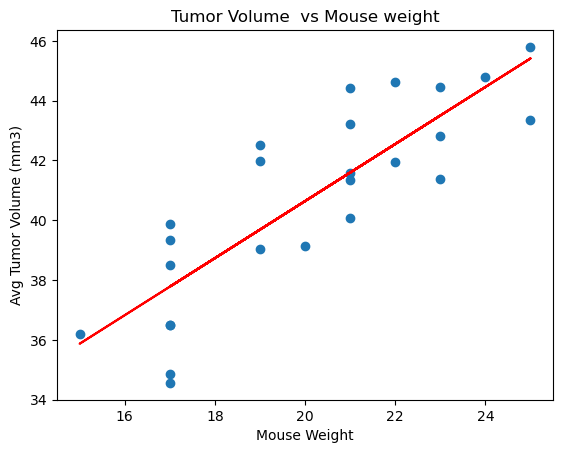

In [108]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
MSiD =  mouse_data_complete["Mouse ID"]
MSWT =  mouse_data_complete["Weight (g)"]
 
MSiD = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

corr = MSiD["Weight (g)"].corr(MSiD["Tumor Volume (mm3)"])
print(f"The correlation of Mouse Wt vs Avg Tumor Volume is {round(corr,2)}")


MSiD =  MSiD.groupby("Mouse ID").mean()
#MSWT =  clean_mouse_data["Weight (g)"]

slp, intrcpt, rvalue, pvalue, stdr =st.linregress(MSiD["Weight (g)"],MSiD["Tumor Volume (mm3)"])

regrssn_line = slp * MSiD["Weight (g)"] + intrcpt

plt.plot(MSiD["Weight (g)"],regrssn_line,color='red')
#print(f"The correlation of Mouse Wt vs Avg Tumor Volume is", corr)
plt.scatter(x=MSiD["Weight (g)"],y=MSiD["Tumor Volume (mm3)"])
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Tumor Volume  vs Mouse weight')

######NOTE THE TITLE IS ABOVE THE WARNING IN PINK##########